<a href="https://colab.research.google.com/github/EusseJhoan/Tareas_computacional1/blob/master/Datos_Hubei_Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import curve_fit
import matplotlib.gridspec as gridspec

#Solución numerica modelo SIR




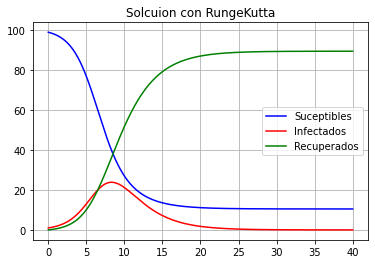

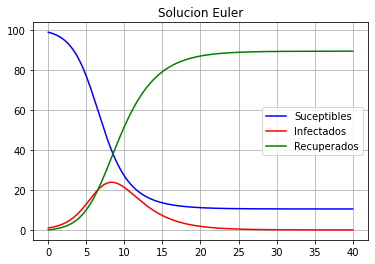

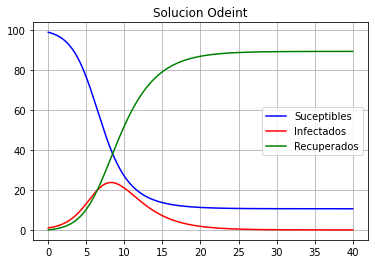

Maximo de infectados para Runge Kutta = 23.867382569317744
Maximo de infectados para Euler = 23.872334657183103
Maximo de infectados para Odeint = 23.750339685988187


In [ ]:
#Runge-Kutta de orden 4
def RK4(t,y,h,f):
    k1=h*f(y,t)
    k2=h*f(y+h*k1*0.5,t+h*0.5)
    k3=h*f(y+h*k2*0.5,t+h*0.5)
    k4=h*f(y+h*k3,t+h)
    return y+(k1+2*k2+2*k3+k4)/6#Formula para hallar yn+1

def Euler(t,y,h,f):
     return y+h*f(y,t)

def ODE(y,t):
    B,N,G=[1,100,0.4]
    S=y[0]
    I=y[1]
    R=y[2]
    dS=-(B*I*S)/N
    dI= (B*I*S)/N - G*I
    dR= G*I
    return np.array([dS,dI,dR])

#NumPuntos=np.array([11,101,1001,10001]) #Numero de puntos en los que divido el intervalo
NumPuntos=1000
t0=0. # Valor inicial de 
tf=40. # Valor final de t
h=(tf-t0)/NumPuntos # Intervalo entre xn+1 y xn
time = np.linspace(t0,tf,NumPuntos)
#Condiciones iniciales
S0=(100)-1
I0=1
R0=0

for i in range (2):

    if i==0:

        Sr=[S0,]
        Ir=[I0,]
        Rr=[R0,]
        y=[S0,I0,R0]

        for t in time[1:]:
            Si, Ii, Ri= RK4(t,y,h,ODE) #Busca el valor de yn+1
            Sr.append(Si)
            Ir.append(Ii)
            Rr.append(Ri)
            y=[Si,Ii,Ri]
        plt.plot(time,Sr,"b",label="Suceptibles")
        plt.plot(time,Ir,"r",label="Infectados")
        plt.plot(time,Rr,"g",label="Recuperados")
        plt.legend()
        plt.title("Solcuion con RungeKutta")
        plt.grid()
        plt.show()

    else:
        Se=[S0,]
        Ie=[I0,]
        Re=[R0,]
        y=[S0,I0,R0]

        for t in time[1:]:
            Si, Ii, Ri= Euler(t,y,h,ODE) #Busca el valor de yn+1
            Se.append(Si)
            Ie.append(Ii)
            Re.append(Ri)
            y=[Si,Ii,Ri]
        plt.plot(time,Se,"b",label="Suceptibles")
        plt.plot(time,Ie,"r",label="Infectados")
        plt.plot(time,Re,"g",label="Recuperados")
        plt.grid()
        plt.title("Solucion Euler")
        plt.legend()
        plt.show()
        

Solution=odeint(ODE,[S0,I0,R0],time)
So=Solution[:,0]
Io=Solution[:,1]
Ro=Solution[:,2]

plt.plot(time,So,"b",label="Suceptibles")
plt.plot(time,Io,"r",label="Infectados")
plt.plot(time,Ro,"g",label="Recuperados")
plt.title("Solucion Odeint")
plt.legend()
plt.grid()
plt.show()

print("Maximo de infectados para Runge Kutta","=",max(Ir))
print("Maximo de infectados para Euler","=",max(Ie))
print("Maximo de infectados para Odeint","=",max(Io))

#Difrenecias entre métodos

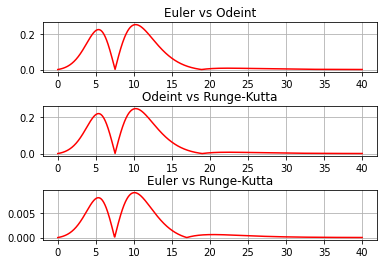

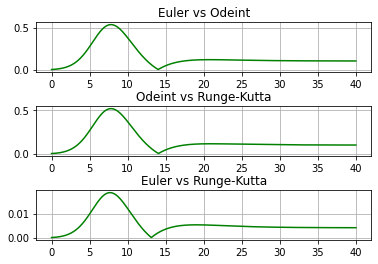

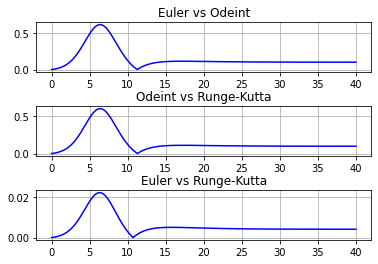

In [ ]:
#Infectados
fig = plt.figure()
fig.subplots_adjust(hspace=0.7, wspace=0.3)
ax1=fig.add_subplot(3, 1, 1)
ax2=fig.add_subplot(3, 1, 2)
ax3=fig.add_subplot(3, 1, 3)

ax1.plot(time,np.abs(np.array(Ie)-np.array(Io)),"r")
ax1.set_title('Euler vs Odeint')
ax1.grid()

ax2.plot(time,np.abs(np.array(Ir)-np.array(Io)),"r")
ax2.set_title("Odeint vs Runge-Kutta")
ax2.grid()

ax3.plot(time,np.abs(np.array(Ir)-np.array(Ie)),"r")
ax3.set_title('Euler vs Runge-Kutta')
ax3.grid()

#RECUPERADOS
fig = plt.figure()
fig.subplots_adjust(hspace=0.7, wspace=0.3)
ax4=fig.add_subplot(3, 1, 1)
ax5=fig.add_subplot(3, 1, 2)
ax6=fig.add_subplot(3, 1, 3)

ax4.plot(time,np.abs(np.array(Re)-np.array(Ro)),"g")
ax4.set_title('Euler vs Odeint')
ax4.grid()

ax5.plot(time,np.abs(np.array(Rr)-np.array(Ro)),"g")
ax5.set_title("Odeint vs Runge-Kutta")
ax5.grid()

ax6.plot(time,np.abs(np.array(Rr)-np.array(Re)),"g")
ax6.set_title('Euler vs Runge-Kutta')
ax6.grid()

#Suceptibles
fig = plt.figure()
fig.subplots_adjust(hspace=0.7, wspace=0.3)
ax7=fig.add_subplot(3, 1, 1)
ax8=fig.add_subplot(3, 1, 2)
ax9=fig.add_subplot(3, 1, 3)

ax7.plot(time,np.abs(np.array(Se)-np.array(So)),"b")
ax7.set_title('Euler vs Odeint')
ax7.grid()

ax8.plot(time,np.abs(np.array(Sr)-np.array(So)),"b")
ax8.set_title("Odeint vs Runge-Kutta")
ax8.grid()

ax9.plot(time,np.abs(np.array(Sr)-np.array(Se)),"b")
ax9.set_title('Euler vs Runge-Kutta')
ax9.grid()

#Convergencia

Maximo de infectados para Runge Kutta Numero de pasos 13 = 5.682893260369207
Maximo de infectados para Euler Numero de pasos 13 = 34.57974971412734
Maximo de infectados para Odeint Numero de pasos 13 = 20.972760450467746
Maximo de infectados para Runge Kutta Numero de pasos 20 = 17.279257283133774
Maximo de infectados para Euler Numero de pasos 20 = 30.102781162775898
Maximo de infectados para Odeint Numero de pasos 20 = 23.719541829324395
Maximo de infectados para Runge Kutta Numero de pasos 40 = 23.67449783781277
Maximo de infectados para Euler Numero de pasos 40 = 26.966872992854384
Maximo de infectados para Odeint Numero de pasos 40 = 23.747618691762703
Maximo de infectados para Runge Kutta Numero de pasos 100 = 24.46633097045574
Maximo de infectados para Euler Numero de pasos 100 = 25.01785135020751
Maximo de infectados para Odeint Numero de pasos 100 = 23.715891164518386
Maximo de infectados para Runge Kutta Numero de pasos 1000 = 23.867382569317744
Maximo de infectados para Eule

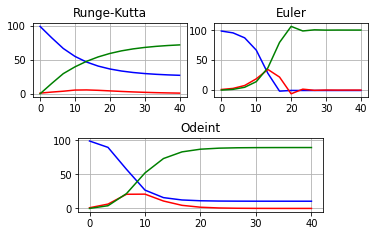

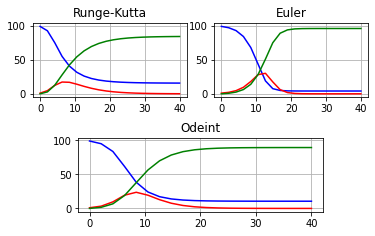

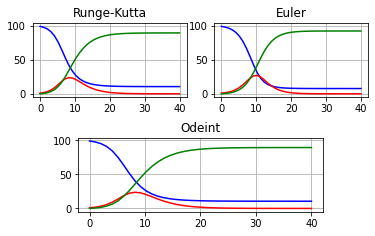

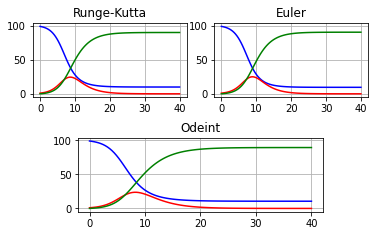

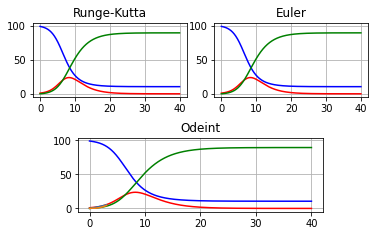

In [ ]:
NumPuntos=np.array([13,20,40,100,1000]) #Numero de puntos en los que divido el intervalo
t0=0. # Valor inicial de 
tf=40. # Valor final de t 
#Condiciones iniciales
S0=(100)-1
I0=1
R0=0
H=[]
yde=[]
ydr=[]
for k in NumPuntos:
    time = np.linspace(t0,tf,k)
    h=(tf-t0)/k
    
   
    H.append(h)
   
  

    #Solucion Odeint   
    Solution=odeint(ODE,[S0,I0,R0],time)
    So=Solution[:,0]
    Io=Solution[:,1]
    Ro=Solution[:,2]

        

    #Solucion Runge-Kutta
    Sr=[S0,]
    Ir=[I0,]
    Rr=[R0,]
    y=[S0,I0,R0]

    for t in time[1:]:
        Si, Ii, Ri= RK4(t,y,h,ODE) #Busca el valor de yn+1
        Sr.append(Si)
        Ir.append(Ii)
        Rr.append(Ri)
        y=[Si,Ii,Ri]
  
    ydr.append(np.mean(np.abs(np.array(Io)-np.array(Ir))))
       

    #Solucion Euler
    Se=[S0,]
    Ie=[I0,]
    Re=[R0,]
    y=[S0,I0,R0]

    for t in time[1:]:
        Si, Ii, Ri= Euler(t,y,h,ODE) #Busca el valor de yn+1
        Se.append(Si)
        Ie.append(Ii)
        Re.append(Ri)
        y=[Si,Ii,Ri]
    yde.append(np.mean(np.abs(np.array(Io)-np.array(Ie))))
    gs = gridspec.GridSpec(8, 15)
    
    print("Maximo de infectados para Runge Kutta","Numero de pasos",k,"=",max(Ir))
    print("Maximo de infectados para Euler","Numero de pasos",k,"=",max(Ie))
    print("Maximo de infectados para Odeint","Numero de pasos",k,"=",max(Io))
    fig = plt.figure()
    fig.subplots_adjust(hspace=0.7, wspace=0.3)
    ax1 = fig.add_subplot(gs[0:3, 0:7]) # row 0, col 0
    ax1.plot(time,Sr,"b")
    ax1.plot(time,Ir,"r")
    ax1.plot(time,Rr,"g")
    ax1.set_title("Runge-Kutta")
    ax1.grid()

    ax2 = fig.add_subplot(gs[0:3, 8:15]) # row 0, col 1
    ax2.plot(time,Se,"b")
    ax2.plot(time,Ie,"r")
    ax2.plot(time,Re,"g")
    ax2.set_title("Euler")
    ax2.grid()
    ax3 = fig.add_subplot(gs[4:7, 2:13]) # row 1, span all columns
    ax3.plot(time,So,"b")
    ax3.plot(time,Io,"r")
    ax3.plot(time,Ro,"g")
    ax3.set_title("Odeint")
    ax3.grid()
    
plt.plot(H,yde)
plt.plot(H,ydr)
plt.show()
    
    

#LA PRIMERA GRAFICA CORRESPONE A NumPuntos=13
#LA SEGUNDA GRAFICA CORRESPONE A NumPuntos=20
#LA TERCERA GRAFICA CORRESPONE A NumPuntos=40
#LA CUARTA GRAFICA CORRESPONE A NumPuntos=100

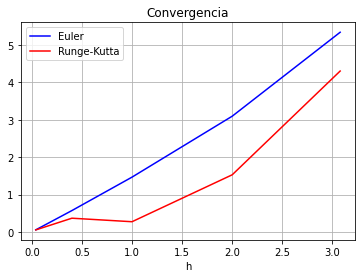

[5.339653166052079, 3.0951021232140024, 1.4653034812401473, 0.5707911658169134, 0.05578112532135812]
[3.076923076923077, 2.0, 1.0, 0.4, 0.04]


In [ ]:
plt.plot(H,yde,"b",label="Euler")
plt.plot(H,ydr,"r",label="Runge-Kutta")
plt.title("Convergencia")
plt.legend()
plt.xlabel("h")
plt.grid()
plt.show()
print(yde)
print(H)

#Parametros

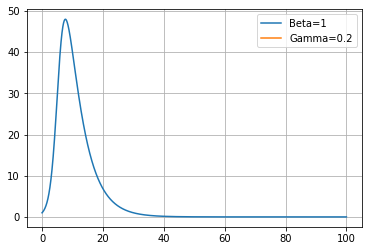

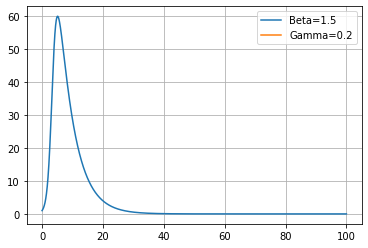

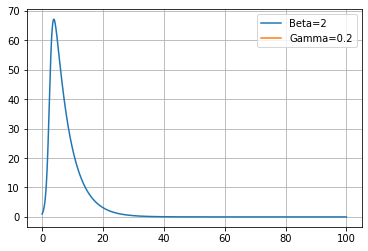

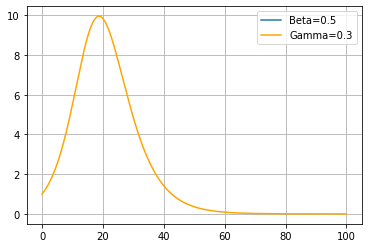

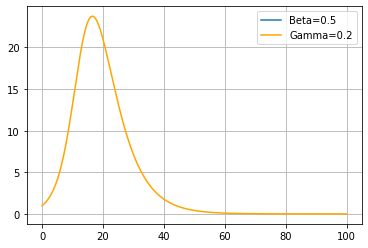

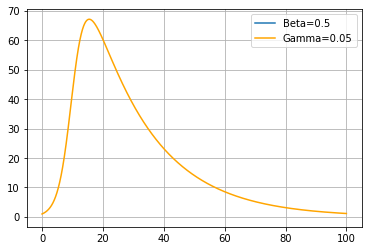

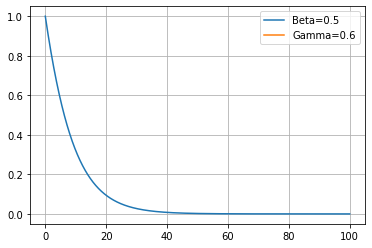

In [ ]:
Be=[1,1.5,2]
Ga=[0.3,0.2,0.05]
Nu=[100,]
NumPuntos=10000 #Numero de puntos en los que divido el intervalo
t0=0. # Valor inicial de 
tf=100. # Valor final de t 
#Condiciones iniciales
S0=(100)-1
I0=1
R0=0
time = np.linspace(t0,tf,NumPuntos)
h=(tf-t0)/NumPuntos

for i in Be:
    def ODE(y,t):
        B,N,G=[i,100,0.2]
        S=y[0]
        I=y[1]
        R=y[2]
        dS=-(B*I*S)/N
        dI= (B*I*S)/N - G*I
        dR= G*I
        return np.array([dS,dI,dR])
    
    Solution=odeint(ODE,[S0,I0,R0],time)
    So=Solution[:,0]
    Io=Solution[:,1]
    Ro=Solution[:,2]  
    if i==1:
        plt.plot(time,Io,label="Beta=1")
    if i==1.5:
        plt.plot(time,Io,label="Beta=1.5")
    if i==2:
        plt.plot(time,Io,label="Beta=2")
    
    
    
    
    plt.plot(0,0,label="Gamma=0.2" )
    plt.legend()
    plt.grid()
    plt.show()
        
for k in Ga:    
    def ODE(y,t):
        B,N,G=[0.5,100,k]
        S=y[0]
        I=y[1]
        R=y[2]
        dS=-(B*I*S)/N
        dI= (B*I*S)/N - G*I
        dR= G*I
        return np.array([dS,dI,dR])
    Solution=odeint(ODE,[S0,I0,R0],time)
    So=Solution[:,0]
    Io=Solution[:,1]
    Ro=Solution[:,2] 
    plt.plot(0,0,label= "Beta=0.5")
    if k==0.3: 
        plt.plot(time,Io,"orange",label="Gamma=0.3" )
        
    if k==0.2: 
        plt.plot(time,Io,"orange",label="Gamma=0.2" )
        
    if k==0.05: 
        plt.plot(time,Io,"orange",label="Gamma=0.05" )
    plt.grid()
    plt.legend()
    plt.show()
    

####Caso de no pandemia
def ODE(y,t):
    B,N,G=[0.5,100,0.6] 
    S=y[0]
    I=y[1]
    R=y[2]
    dS=-(B*I*S)/N
    dI= (B*I*S)/N - G*I
    dR= G*I
    return np.array([dS,dI,dR])

Solution=odeint(ODE,[S0,I0,R0],time)
So=Solution[:,0]
Io=Solution[:,1]
Ro=Solution[:,2] 
plt.plot(time,Io,label= "Beta=0.5")
plt.plot(0,0,label="Gamma=0.6" )
plt.grid()
plt.legend()
plt.show()

#Ajuste de datos Wuhan con modelo SIR

##Cargando datos

In [ ]:
#Confirmados
url1='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
df1 = pd.read_csv(url1, error_bad_lines=False)
#Recuperados
url2='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
df2= pd.read_csv(url2, error_bad_lines=False)
#Muertos
url3='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
df3= pd.read_csv(url3, error_bad_lines=False)

#Creando arreglo de casos confirmados
hubei_conf=df1.loc[df1["Province/State"] == "Hubei"]
hubei2_conf=hubei_conf.drop(["Province/State","Country/Region","Lat","Long"], axis=1)
arr_conf=np.array(hubei2_conf.values.tolist()[0])

#Creando arreglo de casos recuperados
hubei_rec=df2.loc[df2["Province/State"] == "Hubei"]
hubei2_rec=hubei_rec.drop(["Province/State","Country/Region","Lat","Long"], axis=1)
arr_rec=np.array(hubei2_rec.values.tolist()[0])

#Creando arreglo de casos muertos
hubei_det=df3.loc[df3["Province/State"] == "Hubei"]
hubei2_det=hubei_det.drop(["Province/State","Country/Region","Lat","Long"], axis=1)
arr_det=np.array(hubei2_det.values.tolist()[0])

removed=arr_det+arr_rec #Lista con casos removidos (muertos o recuperados)
infected=arr_conf-removed #Lista con numero de infectados
dias=np.arange(len(arr_conf)) #Arreglo con numero de días desde que se tiene el primer reporte

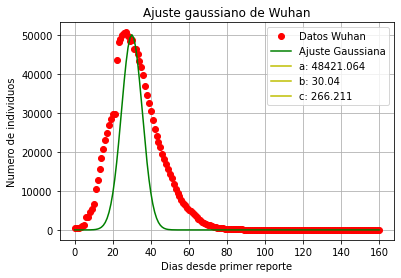

In [ ]:
#Definicion de funcion gaussiana
def gaussian(x, amp, cen, wid):
    return amp * exp(-(x-cen)**2 / wid)


init_vals = [50000, 30, 60]  # Valores inciales para empezar a ajustar [amp, cen, wid]=[a,b,c]
best_vals, covar = curve_fit(gaussian, dias, infected, p0=init_vals) # Ajuste con funcióón gaussiana

#Graficas
plt.plot(dias,infected,"ro",label="Datos Wuhan")
plt.plot(dias,gaussian(dias, init_vals[0], init_vals[1], init_vals[2]),"g",label="Ajuste Gaussiana")
plt.plot(0,0,"y",label="a: {}".format(np.round(best_vals[0],3)))
plt.plot(0,0,"y",label="b: {}".format(np.round(best_vals[1],3)))
plt.plot(0,0,"y",label="c: {}".format(np.round(best_vals[2],3)))
plt.title("Ajuste gaussiano de Wuhan")
plt.ylabel("Numero de individuos")
plt.xlabel("Dias desde primer reporte")
plt.legend()
plt.grid()

[]

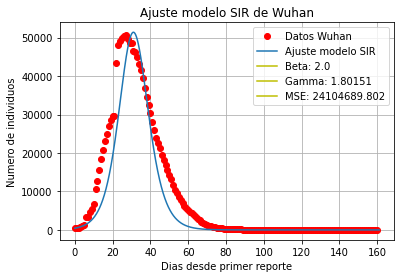

In [ ]:
#intervalo para buscar parámetros beta y gamma
guess=np.linspace(1.5,2,200)

errores=[] #Lista vacia para almacenar errores cuadráticos medios
beta=[] #Lista vacia para almacenar parámetros beta
gamma=[] #Lista vacia para almacenar parámetros gamma
soluciones=[] #Lista vacia para almacenar soluciones de la ODE para el número de infectados

#Ciclo para solucionar la ODE y comparar con la función gaussiana que ajsuta a los datos
for i in guess:
    for j in guess: 

      def ODE(y,t):
          B,N,G=[i,10e6,j]
          S=y[0]
          I=y[1]
          R=y[2]
          dS=-(B*I*S)/N
          dI= (B*I*S)/N - G*I
          dR= G*I
          return np.array([dS,dI,dR])


      NumPuntos=10001
      t0=0. # Valor inicial de 
      tf=len(arr_conf) # Valor final de t
      time = np.linspace(t0,tf,NumPuntos)
      #Condiciones iniciales
      S0=(10e6)-1
      I0=444
      R0=0
      Solution=odeint(ODE,[S0,I0,R0],time)
      Io=np.array(Solution[:,1]) #Solución de I
      dat=np.array(gaussian(time, init_vals[0], init_vals[1], init_vals[2]))
      err=np.sum(((Io-dat)**2))/len(Io)
      soluciones.append(Io)
      errores.append(err)
      beta.append(i)
      gamma.append(j)
      
min_index = np.where(np.array(errores) == np.amin(np.array(errores)))[0][0] #Extrayendo el índice de


#Graficas
plt.plot(dias,infected,"ro", label="Datos Wuhan")
plt.plot(time,soluciones[min_index],label="Ajuste modelo SIR")
plt.plot(0,0,"y",label="Beta: {}".format(np.round(beta[min_index],5)))
plt.plot(0,0,"y",label="Gamma: {}".format(np.round(gamma[min_index],5)))
plt.plot(0,0,"y",label="MSE: {}".format(np.round(errores[min_index],3)))
plt.title("Ajuste modelo SIR de Wuhan")
plt.ylabel("Numero de individuos")
plt.xlabel("Dias desde primer reporte")
plt.legend()

plt.grid()
plt.plot()